In [1]:
from ubibetter.models.compute_fraction  import compute_fraction
from ubibetter.utils.data.get_neigbours import get_neighbours
from ubibetter.models.compute_fraction import compute_fraction
from betbrain.manager.data_manager import data_manager

import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dm = data_manager(sport='Basket')

In [3]:
data = dm.__get_data__()

In [4]:
data.head()

odds        \
                                                                      0     1   
MatchDate  HomeTeam            AwayTeam           bkmr                          
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    2.70  1.50   
                                                  pinnacle_op_ha_  2.80  1.51   
           Dallas Mavericks    Washington Wizards bet365_op_ha_    4.20  1.25   
                                                  pinnacle_op_ha_  4.40  1.27   
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    4.25  1.23   

                                                                   prob        \
                                                                      0     1   
MatchDate  HomeTeam            AwayTeam           bkmr                          
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    0.36  0.64   
                                                  pinnacle_op_ha_  0.35  0.65   
           Dallas Mavericks    Washington Wizards bet365_op_ha_    0.23  0.77   
                                                  pinnacle_op_ha_  0.22  0.78   
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    0.22  0.78   

                                                                    book FTR  
                                                                              
MatchDate  HomeTeam            AwayTeam           bkmr                        
2009-10-27 Cleveland Cavaliers Boston Celtics     bet365_op_ha_    0.037   0  
                                                  pinnacle_op_ha_  0.019   0  
           Dallas Mavericks    Washington Wizards bet365_op_ha_    0.038   0  
                                                  pinnacle_op_ha_  0.015   0  
2009-10-28 Atlanta Hawks       Indiana Pacers     bet365_op_ha_    0.048   1

In [5]:
train = data[data.index.get_level_values(0) < datetime(2017, 1, 1)]
test  = data[data.index.get_level_values(0) > datetime(2017, 1, 1)]

In [6]:
matrix = dm.ubibetter.get_matrix(train,[('prob', 0), ('prob', 1), 'book', 'FTR'])
matrix = matrix.stack().unstack(level=2)
matrix = matrix[matrix.sum(axis=1) > 100].stack().unstack(level=2).fillna(0)

/Users/Gabriele/Library/Mobile Documents/com~apple~CloudDocs/Kellify/Projects/ubipy/env/lib/python3.7/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [7]:
matrix.head()

book                     0.043  0.052  0.046  0.042  0.044  0.047  0.053  \
(prob, 0) (prob, 1) FTR                                                    
0.10      0.90      0      7.0    7.0    0.0    0.0    0.0    0.0    0.0   
                    1    109.0  122.0    0.0    0.0    0.0    0.0    0.0   
0.11      0.89      0      0.0    0.0   15.0    0.0    0.0    0.0    0.0   
                    1      0.0    0.0  144.0    0.0    0.0    0.0    0.0   
0.12      0.88      0      0.0    0.0    0.0   41.0    0.0    0.0    0.0   

book                     0.051  0.059  0.019  ...  0.033  0.062  0.015  0.032  \
(prob, 0) (prob, 1) FTR                       ...                               
0.10      0.90      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
                    1      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
0.11      0.89      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
                    1      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   
0.12      0.88      0      0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0   

book                     0.036  0.061  0.064  0.049  0.071  0.082  
(prob, 0) (prob, 1) FTR                                            
0.10      0.90      0      0.0    0.0    0.0    0.0    0.0    0.0  
                    1      0.0    0.0    0.0    0.0    0.0    0.0  
0.11      0.89      0      0.0    0.0    0.0    0.0    0.0    0.0  
                    1      0.0    0.0    0.0    0.0    0.0    0.0  
0.12      0.88      0      0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 51 columns]

In [9]:
test   = test.reset_index(level=3).set_index(['book','bkmr'], append=True)
vicini = test.prob.apply(get_neighbours, axis=1).rename('NN').to_frame()

In [11]:
# Togliere iloc alla fine
probs  = vicini.apply(dm.ubibetter.__compute_probs__, axis=1, args=[matrix])
probs.columns = pd.MultiIndex.from_tuples([('KLFY', c) for c in probs.columns])

In [12]:
probs.head()

KLFY  \
                                                                               0   
MatchDate  HomeTeam           AwayTeam        book  bkmr                           
2017-01-02 Los Angeles Lakers Toronto Raptors 0.035 5dimes_op_ha_       0.221239   
                                              0.057 bet-at-home_op_ha_  0.000000   
                                              0.038 bet365_op_ha_            NaN   
                                              0.051 bwin_op_ha_              NaN   
                                              0.019 marathon_op_ha_          NaN   

                                                                                  
                                                                               1  
MatchDate  HomeTeam           AwayTeam        book  bkmr                          
2017-01-02 Los Angeles Lakers Toronto Raptors 0.035 5dimes_op_ha_       0.778761  
                                              0.057 bet-at-home_op_ha_  0.000000  
                                              0.038 bet365_op_ha_            NaN  
                                              0.051 bwin_op_ha_              NaN  
                                              0.019 marathon_op_ha_          NaN

In [11]:
aux = pd.concat([test.odds.stack().rename('odd'), probs.KLFY.stack().rename('prob')], axis=1, join='inner')
aux = aux.reset_index(level=5).merge(test['FTR'], right_index=True, left_index=True)
aux = aux.reset_index(level=3, drop=True)
aux = aux.rename(columns={'level_5':'level_4'})

In [12]:
aux.head(6)

level_4  \
MatchDate  HomeTeam           AwayTeam        bkmr                          
2017-01-02 Los Angeles Lakers Toronto Raptors tonybet_op_ha_            1   
                                              tonybet_op_ha_            0   
                                              5dimes_op_ha_             1   
                                              5dimes_op_ha_             0   
                                              bet-at-home_op_ha_        0   
                                              bet-at-home_op_ha_        1   

                                                                   odd  \
MatchDate  HomeTeam           AwayTeam        bkmr                       
2017-01-02 Los Angeles Lakers Toronto Raptors tonybet_op_ha_      1.26   
                                              tonybet_op_ha_      4.26   
                                              5dimes_op_ha_       1.26   
                                              5dimes_op_ha_       4.15   
                                              bet-at-home_op_ha_  4.22   
                                              bet-at-home_op_ha_  1.22   

                                                                      prob  \
MatchDate  HomeTeam           AwayTeam        bkmr                           
2017-01-02 Los Angeles Lakers Toronto Raptors tonybet_op_ha_      0.000000   
                                              tonybet_op_ha_      0.000000   
                                              5dimes_op_ha_       0.778761   
                                              5dimes_op_ha_       0.221239   
                                              bet-at-home_op_ha_  0.000000   
                                              bet-at-home_op_ha_  0.000000   

                                                                  FTR  
MatchDate  HomeTeam           AwayTeam        bkmr                     
2017-01-02 Los Angeles Lakers Toronto Raptors tonybet_op_ha_        1  
                                              tonybet_op_ha_        1  
                                              5dimes_op_ha_         1  
                                              5dimes_op_ha_         1  
                                              bet-at-home_op_ha_    1  
                                              bet-at-home_op_ha_    1

In [13]:
frac = aux.groupby(level=[0,1,2,3]).apply(compute_fraction).rename('frac').to_frame()
aux  = pd.concat([aux.set_index('level_4', append=True), frac.round(4)], axis=1).reset_index(level=4)

In [14]:
def perform_simulation(x):
    if x['level_4'] == x['FTR']:
        return (x['odd'] - 1) * x['frac']
    elif x['level_4'] != x['FTR']:
        return -x['frac']

In [15]:
aux['margin'] = aux.apply(perform_simulation, axis=1)

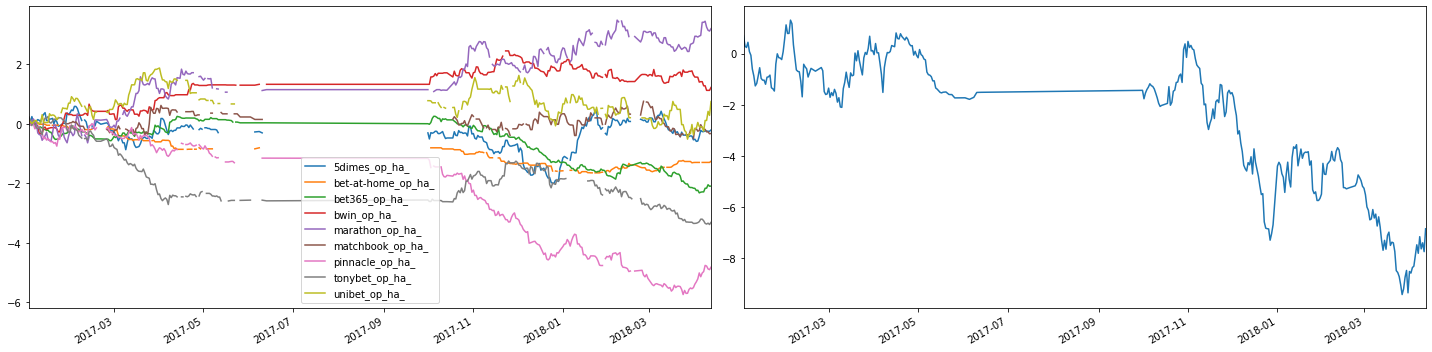

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
aux.margin.groupby(level=[0,3]).sum().unstack().cumsum().plot(ax=ax[0])
aux.margin.groupby(level=[0]).sum().cumsum().plot(ax=ax[1])
plt.tight_layout()